In [11]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
data = pd.read_csv("biodeg.csv", sep = " ")

# check shape of dataset
print("shape of the data:", data.shape)
data.head()

shape of the data: (1055, 21)


,SpMax_L,J_Dz(e),C%,SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,...,B01[C-Br],B03[C-Cl],SpMax_A,Psi_i_1d,SdO,TI2_L,SpMax_B(m),Psi_i_A,SM6_B(m),Y
1,3.919,2.6909,31.4,0.000,3.106,2.550,9.002,0,0.960,1.142,...,0,0,1.932,0.011,0.000,4.489,2.949,1.591,7.253,1
2,4.170,2.1144,30.8,0.000,2.461,1.393,8.723,1,0.989,1.144,...,0,0,2.214,-0.204,0.000,1.542,3.315,1.967,7.257,1
3,3.932,3.2512,26.7,0.000,3.279,2.585,9.110,0,1.009,1.152,...,0,0,1.942,-0.008,0.000,4.891,3.076,2.417,7.601,1
4,3.000,2.7098,20.0,0.000,2.100,0.918,6.594,0,1.108,1.167,...,0,0,1.414,1.073,8.361,1.333,3.046,5.000,6.690,1
5,4.236,3.3944,29.4,-0.271,3.449,2.753,9.528,2,1.004,1.147,...,0,0,1.985,-0.002,10.348,5.588,3.351,2.405,8.003,1


In [3]:
# check data types of all columns
data.dtypes

SpMax_L        float64
J_Dz(e)        float64
C%             float64
SdssC          float64
HyWi_B(m)      float64
LOC            float64
SM6_L          float64
F03[C-O]         int64
Me             float64
Mi             float64
SpPosA_B(p)    float64
B01[C-Br]        int64
B03[C-Cl]        int64
SpMax_A        float64
Psi_i_1d       float64
SdO            float64
TI2_L          float64
SpMax_B(m)     float64
Psi_i_A        float64
SM6_B(m)       float64
Y                int64
dtype: object

In [4]:
data["F03[C-O]"]=pd.Categorical(data["F03[C-O]"],ordered=False)
data["B01[C-Br]"]=pd.Categorical(data["B01[C-Br]"],ordered=False)
data["B03[C-Cl]"]=pd.Categorical(data["B03[C-Cl]"],ordered=False)
data["Y"]=pd.Categorical(data["Y"],ordered=False)

In [5]:
#check missing data
data.isnull().sum()

SpMax_L        0
J_Dz(e)        0
C%             0
SdssC          0
HyWi_B(m)      0
LOC            0
SM6_L          0
F03[C-O]       0
Me             0
Mi             0
SpPosA_B(p)    0
B01[C-Br]      0
B03[C-Cl]      0
SpMax_A        0
Psi_i_1d       0
SdO            0
TI2_L          0
SpMax_B(m)     0
Psi_i_A        0
SM6_B(m)       0
Y              0
dtype: int64

0    771
1    284
Name: Y, dtype: int64


Text(0.5, 1.0, 'target variable')

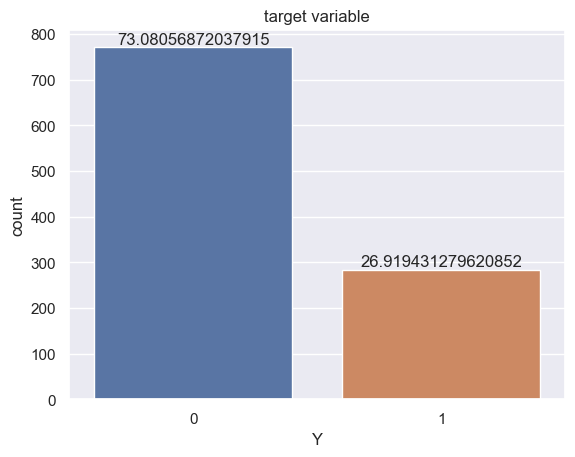

In [6]:
# target class count
print(data["Y"].value_counts())

sns.set(style="darkgrid")
per = data["Y"].value_counts()/len(data)*100
ax = sns.countplot(x="Y", data=data)
for c in ax.containers:  
    ax.bar_label(c, labels=[per[0], per[1]], label_type='edge')
plt.title("target variable")

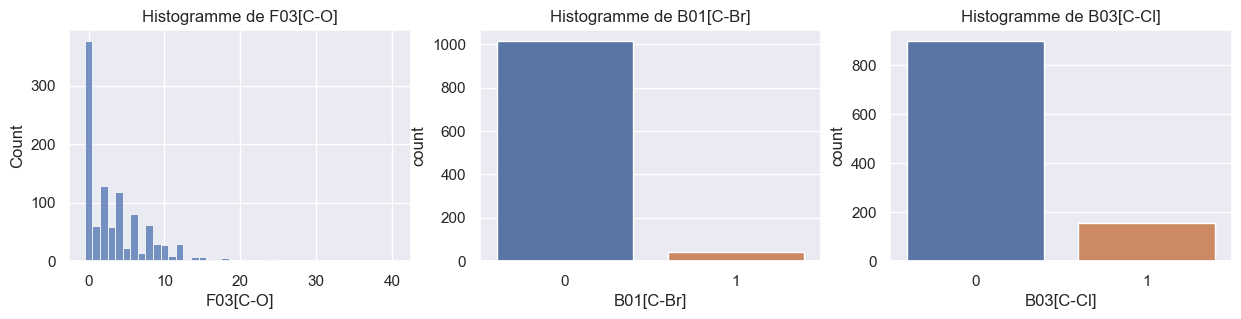

In [7]:
#Visualisation des variables qualitatives

fig, axs = plt.subplots(1,3, figsize=(15,3))
sns.histplot(x = "F03[C-O]", data = data, ax = axs[0])
sns.countplot(x = "B01[C-Br]", data = data, ax = axs[1])
sns.countplot(x = "B03[C-Cl]", data = data, ax = axs[2])
axs[0].title.set_text("Histogramme de F03[C-O]")
axs[1].title.set_text("Histogramme de B01[C-Br]")
axs[2].title.set_text("Histogramme de B03[C-Cl]")

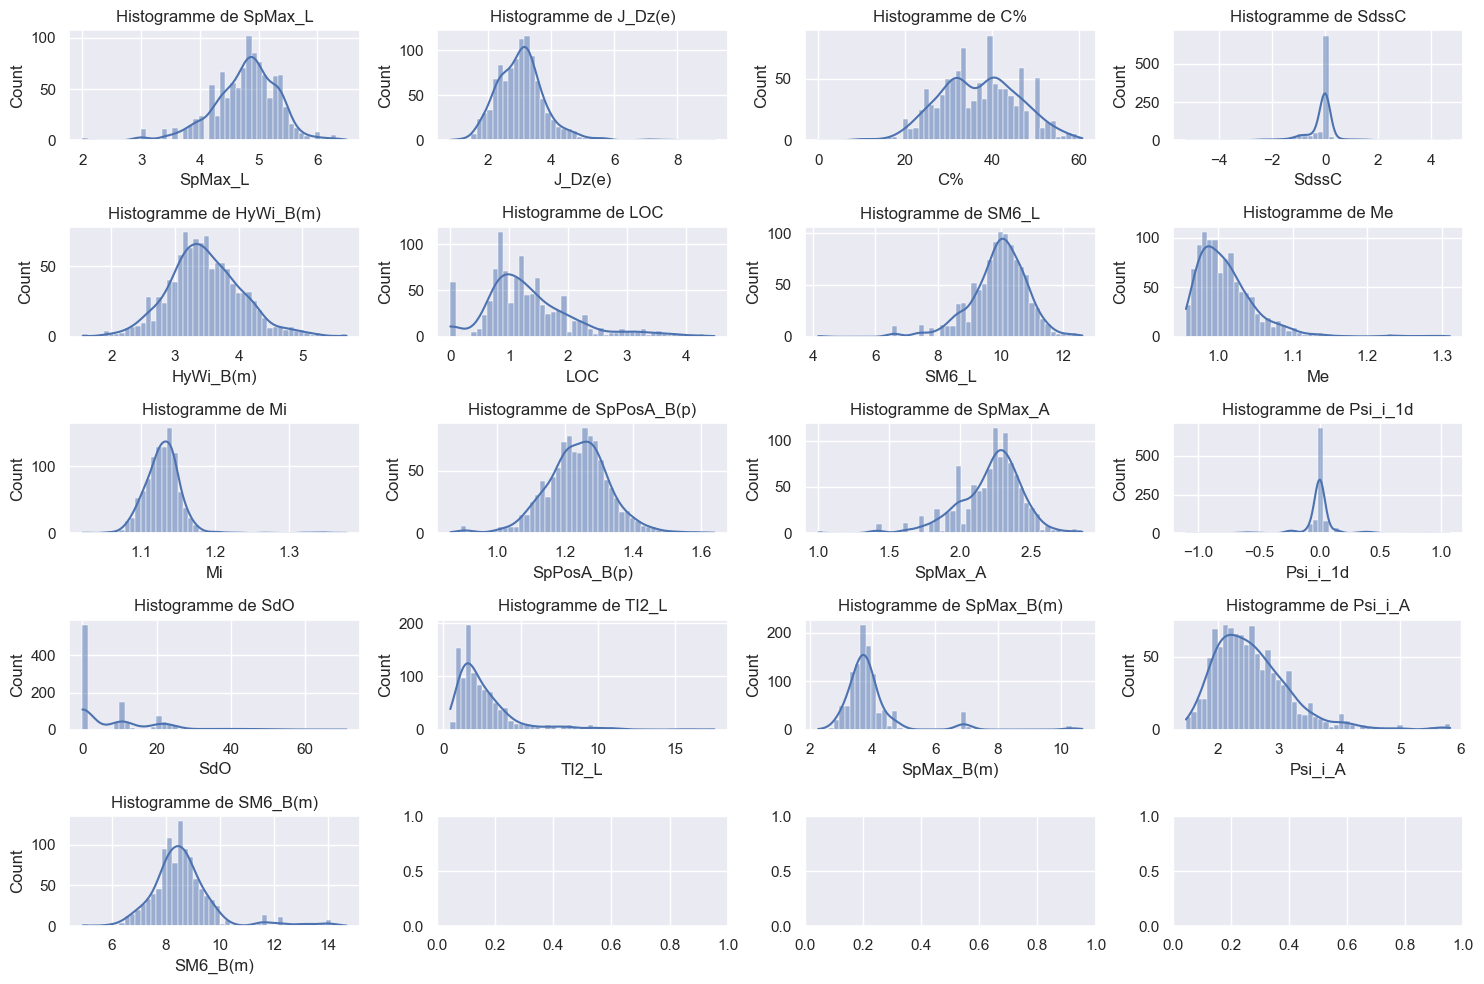

In [8]:
#Visualisation des variables quantitatives
fig, axs = plt.subplots(5,4, figsize=(15,10))
axs = axs.ravel()

colnames=[]
for c in data.columns:
    if data[c].dtype=="float64":
        colnames.append(c)

for col, ax in zip(colnames, axs):
    sns.histplot(data[col], kde=True, bins=50, ax=ax)
    ax.set_title("Histogramme de " + col)

plt.tight_layout()

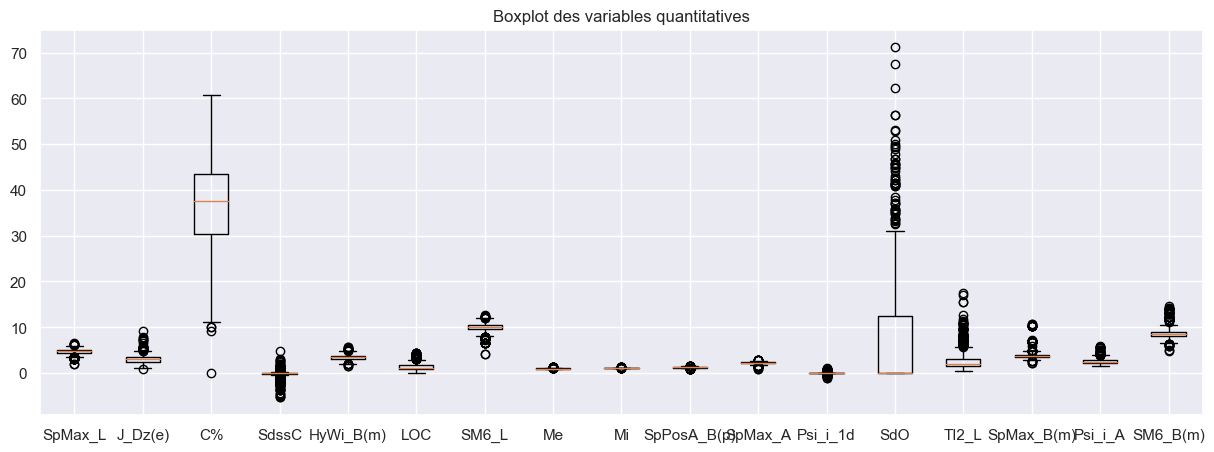

In [9]:
#boxplot
fig = plt.figure(figsize=(15,5))

plt.boxplot(data[colnames], labels = colnames)
plt.title("Boxplot des variables quantitatives")
plt.show()

In [28]:
d = preprocessing.scale(data[colnames], axis=0)
scaled_data = pd.DataFrame(d, columns=data[colnames].columns)
print(scaled_data)

       SpMax_L   J_Dz(e)        C%     SdssC  HyWi_B(m)       LOC     SM6_L  \
0    -1.579865 -0.455652 -0.618770  0.256245  -0.635144  1.526208 -1.007696   
1    -1.120710 -1.149466 -0.684415  0.256245  -1.739836  0.053811 -1.308266   
2    -1.556084  0.218665 -1.132986  0.256245  -0.338847  1.570749 -0.891346   
3    -3.260993 -0.432906 -1.866017  0.256245  -2.358121 -0.550673 -3.601860   
4    -0.999976  0.391006 -0.837585 -0.096024  -0.047688  1.784545 -0.441031   
...        ...       ...       ...       ...        ...       ...       ...   
1050  1.186039 -0.209417 -0.542185  0.742403  -0.417631 -0.660117  0.801109   
1051  0.922620  0.365492 -0.192080 -6.575962   1.442362  1.266598  1.176013   
1052  0.157972 -1.567560  0.803529 -0.252011   1.641035 -0.353421  1.222337   
1053  0.686640 -1.658544  2.083598  0.256245   2.440866 -1.391861  2.024934   
1054  0.536637 -0.494284  1.908546  0.256245   0.539769 -0.862460  0.419741   

            Me        Mi  SpPosA_B(p)   SpMax_A  Ps

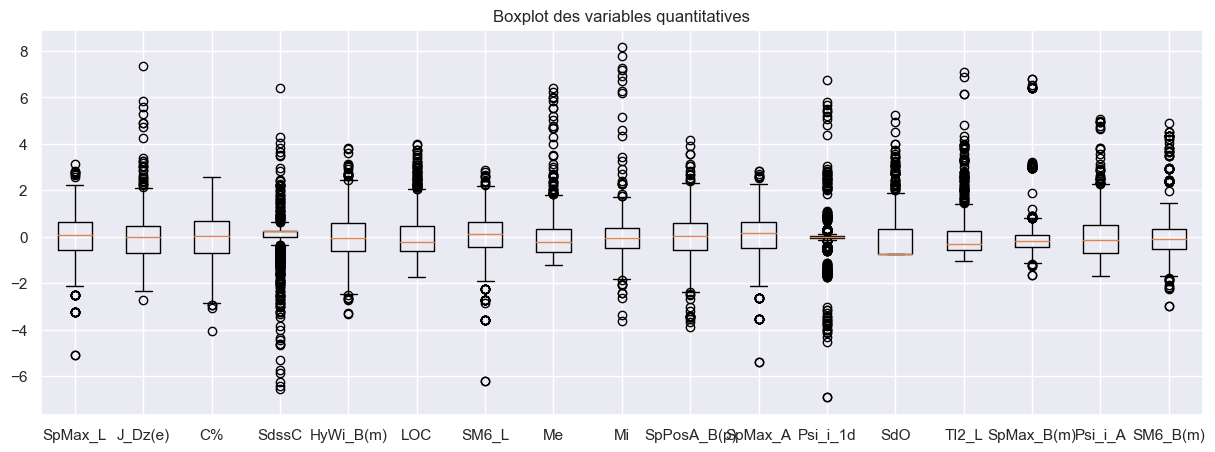

In [29]:
#boxplot
fig = plt.figure(figsize=(15,5))

plt.boxplot(scaled_data[colnames], labels = colnames)
plt.title("Boxplot des variables quantitatives")
plt.show()

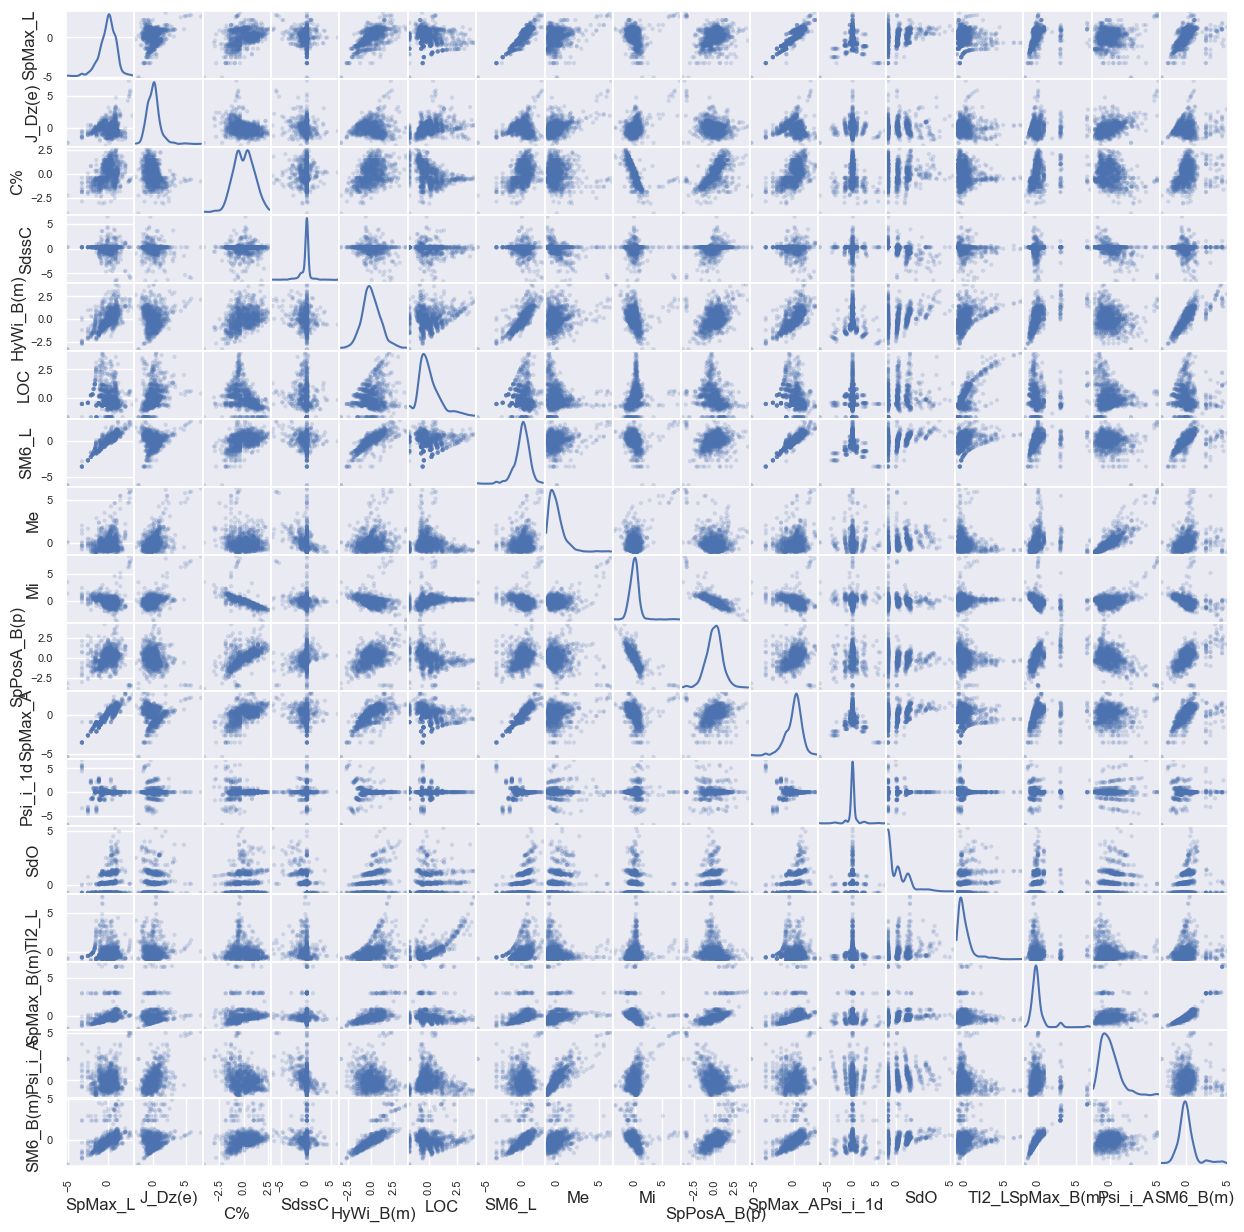

In [31]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
scatter_matrix(scaled_data, alpha=0.2, 
               figsize=(15, 15), diagonal='kde')
plt.show()